# **CENG 471 Introduction to Image Processing**


### Assignment 3 - Image Stiching
### Due: January 18 by 11:59pm

## Introduction

The goal of this assignment is to automatically create a panoramic image using two images

* [Imports](#1)
* [Detect keypoints and compute descriptors](#2)
* [Show best matches](#3)
* [RANSAC method to estimate homography](#4)
* [Apply transformation (warping) on one image and Stitch images together](#5)


<a id="1"></a>
### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<a id="2"></a>
### Detect keypoints and compute descriptors

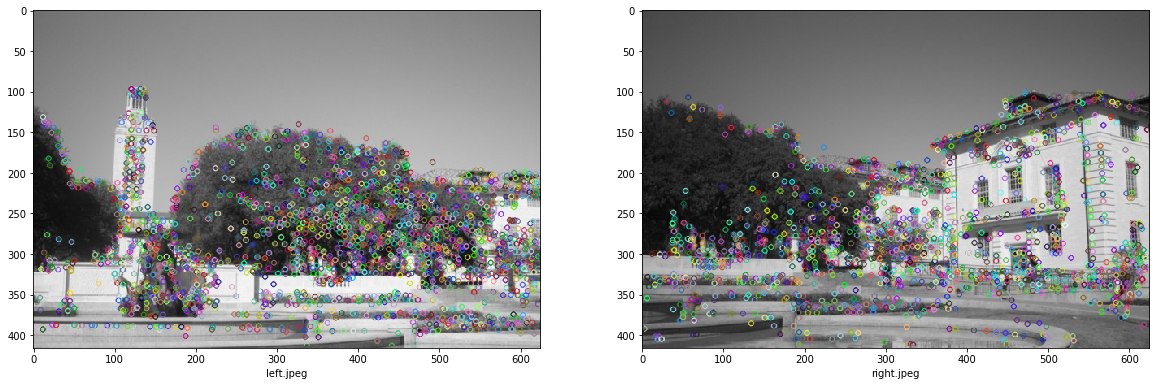

True

In [117]:
# Get input set of images
img1 = cv2.imread('./left.jpeg') 
img2 = cv2.imread('./right.jpeg')

#convert to grayscale
imgLeft= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
imgRight=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#find keypoints and descriptors using sift algorithm
sift = cv2.xfeatures2d.SIFT_create()

#Extract keypoints and descriptors
k1, d1 = sift.detectAndCompute(imgLeft, None)
k2, d2 = sift.detectAndCompute(imgRight, None)

#Show keypoints in images
sifted_left=cv2.drawKeypoints(imgLeft,k1,None)
sifted_right=cv2.drawKeypoints(imgRight,k2,None)
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(sifted_left)
ax1.set_xlabel("left.jpeg")
ax2.imshow(sifted_right)
ax2.set_xlabel("right.jpeg")
plt.show()

cv2.imwrite('leftImageKp.jpg',sifted_left)
cv2.imwrite('rightImageKp.jpg',sifted_right)

<a id="3"></a>
### Show best matches

Raw matches (knn): 2186
Good matches: 351


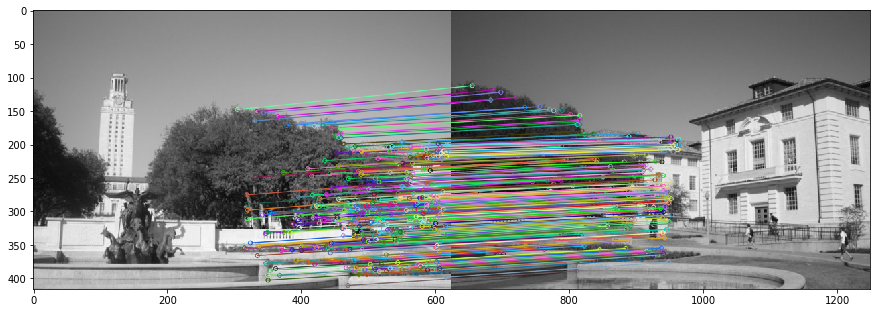

True

In [119]:
ratio = 0.53
min_match = 10

matcher = cv2.BFMatcher()
rawMatches = matcher.knnMatch(d1, d2, k=2)
print("Raw matches (knn):", len(rawMatches))
good_points = []
good_matches = []
for m, n in raw_matches:
    if m.distance < ratio * n.distance:
        good_points.append((m.trainIdx, m.queryIdx))
        good_matches.append([m])

print("Good matches:", len(good_matches))

matches = cv2.drawMatchesKnn(imgLeft, k1, imgRight, k2, good_matches, None, flags=2)
plt.figure(figsize=(15,10))
plt.imshow(matches)
plt.show()

cv2.imwrite('matchedImage.jpg',matches)

<a id="4"></a>
### RANSAC method to estimate homography

In [113]:
if len(good_points) > min_match:
    image1_kp = np.float32([k1[i].pt for (_,i) in good_points])
    image2_kp = np.float32([k2[i].pt for (i,_) in good_points])
    H, status = cv2.findHomography(image2_kp, image1_kp, cv2.RANSAC, 4.0)
print(H)

[[ 7.64745256e-01  3.65740858e-02  2.72572023e+02]
 [-1.35256663e-01  9.10808858e-01  4.64742014e+01]
 [-3.46437768e-04 -5.50747502e-05  1.00000000e+00]]


<a id="5"></a>
### Apply transformation (warping) on one image and Stitch images together

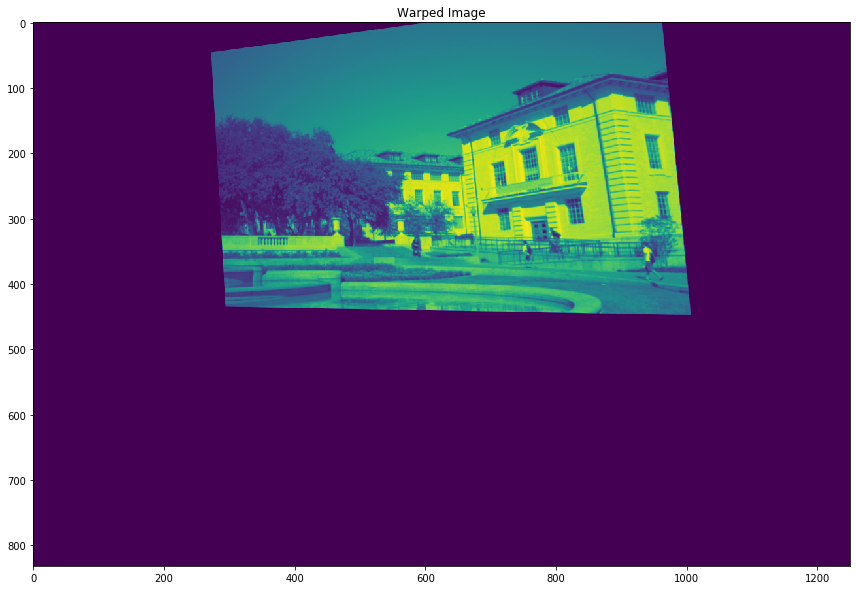

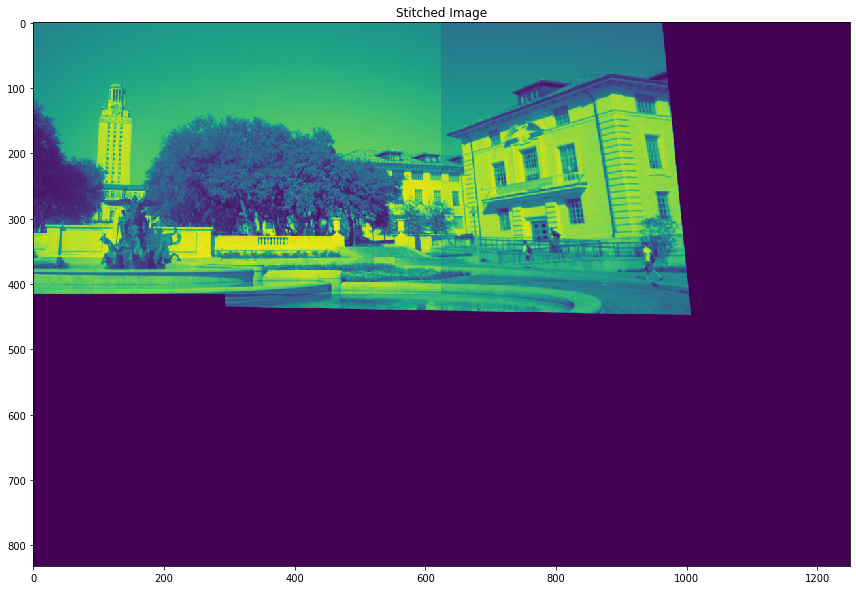

In [116]:
#Warping on img2 (right.jpeg)
#Warp images to get the resulting image

width = imgLeft.shape[1] + imgRight.shape[1]
height = imgLeft.shape[0] + imgRight.shape[0]

warp = cv2.warpPerspective(imgRight, H, (width, height))
plt.figure(figsize=(15,10))
plt.imshow(warp)
plt.title('Warped Image')
plt.show()

#stitch images
plt.figure(figsize=(15,10))
warp[0:imgLeft.shape[0], 0:imgLeft.shape[1]] = imgLeft
cv2.imwrite('stitchImage.jpg',warp)
plt.imshow(warp)
plt.title('Stitched Image')
plt.show()